In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
import h5py
import os

In [2]:
data = pd.read_csv('random_train_dataset.csv')
x = data['x']
y = data['y']
target = data['target']

In [3]:
data = pd.read_csv('../original_phase_diagram.csv')
points = data.drop_duplicates()
points = points.dropna()
points = points.reset_index(drop=True)

drop_idx_1 = [86,88]
for i, point in points.iterrows():
    if point[0]>-0.3:
        drop_idx_1.append(i)
    elif point[1]>0.825081:
        drop_idx_1.append(i)
    elif point[1]<-0.825081:
        drop_idx_1.append(i)
first_part = points.drop(drop_idx_1)
first_part = first_part.sort_values('y')
lst_1 = first_part.index.to_list()

drop_idx_2 = []
drop_idx_2.extend(lst_1)
for i, point in points.iterrows():
    if point[0]>1 or point[0]<-1:
        drop_idx_2.append(i)
drop_idx_2.remove(120)
drop_idx_2.remove(122)
second_part = points.drop(drop_idx_2)
second_part = second_part.sort_values('y')
lst_2 = second_part.index.to_list()

drop_idx_3 =[]
for i, point in points.iterrows():
    if point[0]<0.7:
        drop_idx_3.append(i)
third_part = points.drop(drop_idx_3)
third_part = third_part.sort_values('y')


/tmp/ipykernel_139029/528293740.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if point[0]>-0.3:
/tmp/ipykernel_139029/528293740.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]>0.825081:
/tmp/ipykernel_139029/528293740.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]<-0.825081:
/tmp/ipykernel_139029/528293740.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 

In [4]:
data_test = pd.read_csv('scatter_points.csv')
x_test = data_test['x']
y_test = data_test['y']
target_test = data_test['target']


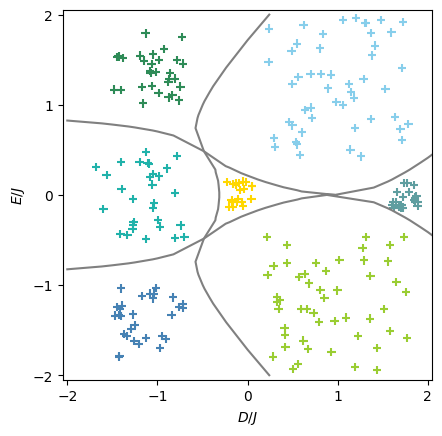

In [5]:
custom_colors = ['seagreen', 'steelblue', 'lightseagreen', 'skyblue', 'yellowgreen', 'cadetblue', 'gold']

# Map each target to its corresponding color
colors = [custom_colors[t] for t in target]

# Scatter plot using manually assigned colors
plt.scatter(x, y, c=colors, marker='+')

plt.xlabel('D')
plt.ylabel('E')

x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')

plt.axis('square')
plt.xlim(-2.05,2.05),plt.ylim(-2.05,2.05)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
#plt.text(x=-1.5, y=-1.5, s='Large-$E_y$', fontdict={'family': 'serif'})
#plt.text(x = -1.5, y = 0.3, s = '$z$-Néel', fontdict={'family': 'serif'})
#plt.text(x = -1.5, y = 1.5, s = 'Large-$E_x$', fontdict={'family': 'serif'})
#plt.text(x = .7, y = -1.5, s = '$x$-Néel', fontdict={'family': 'serif'})
#plt.text(x = .7, y = 1.5, s = '$y$-Néel', fontdict={'family': 'serif'})
#plt.annotate('Haldane',xy=(-.1,-.1), xytext=(0.8,0.6), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
#plt.annotate('Large-$D$', xy = (1.7,0), xytext=(.8,-.7), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')

plt.savefig('train_point_distribution_random.png', dpi=300)
plt.show()

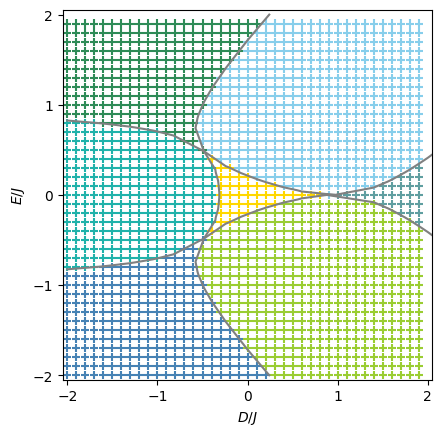

In [6]:
custom_colors = ['seagreen', 'steelblue', 'lightseagreen', 'skyblue', 'yellowgreen', 'cadetblue', 'gold']

# Map each target to its corresponding color
colors = [custom_colors[t] for t in target_test]

# Scatter plot using manually assigned colors
plt.scatter(x_test, y_test, c=colors, marker='+')

plt.xlabel('D')
plt.ylabel('E')

x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')

plt.axis('square')
plt.xlim(-2.05,2.05),plt.ylim(-2.05,2.05)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
#plt.text(x=-1.5, y=-1.5, s='Large-$E_y$', fontdict={'family': 'serif'})
#plt.text(x = -1.5, y = 0.3, s = '$z$-Néel', fontdict={'family': 'serif'})
#plt.text(x = -1.5, y = 1.5, s = 'Large-$E_x$', fontdict={'family': 'serif'})
#plt.text(x = .7, y = -1.5, s = '$x$-Néel', fontdict={'family': 'serif'})
#plt.text(x = .7, y = 1.5, s = '$y$-Néel', fontdict={'family': 'serif'})
#plt.annotate('Haldane',xy=(-.1,-.1), xytext=(0.8,0.6), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
#plt.annotate('Large-$D$', xy = (1.7,0), xytext=(.8,-.7), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')

plt.savefig('train_point_distribution_random.png', dpi=300)
plt.show()

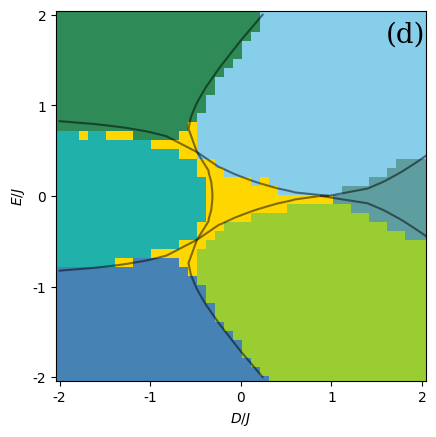

In [7]:
path = f"./train_set_L=31_test_set_L=51_partial_from_24_to_27_spins"
file_path_kernel_train_DMRG= os.path.join(path, "kernel_train_Haldane_DMRG_partial_from_24_to_27_spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, "kernel_test_Haldane_DMRG_partial_from_24_to_27_spins.hdf5")


with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

clf = svm.SVC(kernel='precomputed')
clf.fit(kernel_train, target) 
y_pred = clf.predict(kernel_test)

mat = y_pred.reshape(40,40)
r = mat.shape[0]
c = mat.shape[1]
dx = 4/r
dy = 4/c

for j in range(c):
    for i in range(r):
        if mat[j,i] == 1:#Large_Ey
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color = 'steelblue',s=320, edgecolors='none')
        elif mat[j,i] == 2:#z_neel
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='lightseagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 3:#y_neel
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='skyblue',s =320,  edgecolors='none')
        elif mat[j,i] == 4:#X_neel
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='yellowgreen',s =320,  edgecolors='none')
        elif mat[j,i] == 5: #large_D
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='cadetblue',s =320,  edgecolors='none')
        elif mat[j,i] == 6: #Haldane
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='gold',s =320,  edgecolors='none')
        elif mat[j,i] == 0: #Large_Ex
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='seagreen',s =320,  edgecolors='none')

x1 = first_part['x']+2
y1 = first_part['y']+2
plt.plot(x1,y1,'-',color='black', alpha = 0.5)

x2 = second_part['x']+2
y2 = second_part['y']+2
plt.plot(x2, y2, '-', color = 'black', alpha = 0.5)

x3 = third_part['x']+2
y3 = third_part['y']+2
plt.plot(x3, y3, '-', color = 'black', alpha = 0.5)

plt.axis('square')
plt.xlim([-0.04,4.04])
plt.ylim([-0.04,4.04])
plt.xticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.yticks([0,1,2,3,4],[-2,-1,0,1,2])

plt.xlabel('$D/J$')
plt.ylabel('$E/J$')
plt.text(x=3.6, y=3.7, s='(d)', fontdict={'family': 'serif', 'size': 20})
plt.savefig('scalable keep 4 sites from middle .png')
plt.show()


In [19]:
def accuracy(keep, size_trainset):

    y_true = pd.read_csv('scatter_points.csv')['target']
    path = f"./train_set_L={size_trainset}_test_set_L=51_partial_from_{keep[0]}_to_{keep[-1]}_spins"
    file_path_kernel_train_DMRG= os.path.join(path, f"kernel_train_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5")
    file_path_kernel_test_DMRG= os.path.join(path, f"kernel_test_Haldane_DMRG_partial_from_{keep[0]}_to_{keep[-1]}_spins.hdf5")

    with h5py.File(file_path_kernel_train_DMRG, "r") as f:
        kernel_train = f["gram_train_DMRG_partial"][:] 

    with h5py.File(file_path_kernel_test_DMRG, "r") as f:
        kernel_test = f["gram_test_DMRG_partial"][:] 

    clf = svm.SVC(kernel='precomputed')
    clf.fit(kernel_train, target) 
    y_pred = clf.predict(kernel_test)

    score = metrics.accuracy_score(y_true, y_pred)

    return score

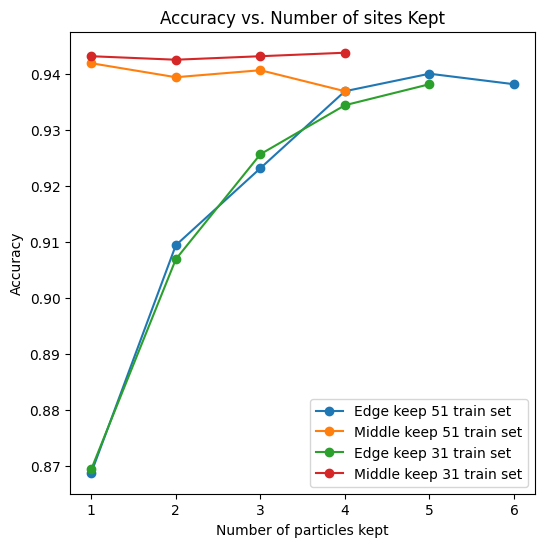

In [40]:
a51b = accuracy(keep=[0], size_trainset=51)
b51b = accuracy(keep=[0,1], size_trainset=51)
c51b = accuracy(keep=[0,1,2], size_trainset=51)
d51b = accuracy(keep=[0,1,2,3], size_trainset=51)
e51b = accuracy(keep=[0,1,2,3,4], size_trainset=51)
f51b = accuracy(keep=[0,1,2,3,4,5], size_trainset=51)

a51m = accuracy(keep=[24], size_trainset=51)
b51m = accuracy(keep=[24,25], size_trainset=51)
c51m = accuracy(keep=[24,25,26], size_trainset=51)
d51m = accuracy(keep=[24,25,26,27], size_trainset=51)

a31b = accuracy(keep=[0], size_trainset=31)
b31b = accuracy(keep=[0,1], size_trainset=31)
c31b = accuracy(keep=[0,1,2], size_trainset=31)
d31b = accuracy(keep=[0,1,2,3], size_trainset=31)
e31b = accuracy(keep=[0,1,2,3,4], size_trainset=31)

a31m = accuracy(keep=[24], size_trainset=31)
b31m = accuracy(keep=[24,25], size_trainset=31)
c31m = accuracy(keep=[24,25,26], size_trainset=31)
d31m = accuracy(keep=[24,25,26,27], size_trainset=31)

x51b = [1,2,3,4,5,6]
y51b = [a51b, b51b, c51b, d51b, e51b,f51b]
x51m = [1,2,3,4]
y51m = [a51m, b51m, c51m, d51m]
x31b = [1,2,3,4,5]
y31b = [a31b, b31b, c31b, d31b, e31b]
x31m = [1,2,3,4]
y31m = [a31m, b31m, c31m, d31m]
plt.figure(figsize=(6, 6))
plt.plot(x51b, y51b, marker = 'o' ,label = 'Edge keep 51 train set')  
plt.plot(x51m, y51m, marker= 'o', label = 'Middle keep 51 train set')
plt.plot(x31b, y31b, marker = 'o', label = 'Edge keep 31 train set')
plt.plot(x31m, y31m,marker = 'o', label='Middle keep 31 train set')
plt.legend()
plt.xlabel("Number of particles kept")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of sites Kept")
plt.savefig('accuracy_vs_sites')
plt.show()